In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotWithRange(variable,nbins,xmin,xmax,xlabel="",histlabel="",axis=None,scalefactor=1,logscale=False,normalize=False,weights=[]):
    binWidth=(float)(xmax-xmin)/nbins
    ax = axis
    # Set all weights to 1, if no weights array is provided
    if len(weights) == 0:
        weights = np.ones_like(variable)
    if axis==None:
        fig,ax = plt.subplots(1,figsize=(15,10))
    if normalize:
        scalefactor = scalefactor / sum(weights)
    binEdges=[xmin+i*binWidth for i in range(nbins+1)]
    y, bin_edges,patches = ax.hist(variable, bins=binEdges,histtype="step",label=histlabel,weights = weights * scalefactor)
    plt.xlabel(xlabel,fontsize=35)
    plt.xlim([xmin,xmax])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.errorbar(
        bin_centers,
        y,
        yerr = (y*scalefactor)**0.5,
        marker = '.',
        linestyle = 'None',
        drawstyle = 'steps-mid',
        color=patches[0].get_edgecolor()
    )
    if logscale:
        plt.yscale("log")
    if histlabel != "":
        plt.legend(fontsize=30)
    return ax

In [11]:
c = 3e8
sigma_z_lhc = 0.05 # m
sigma_t_detector = 20 * 1e-12# s
sigma_z_pps = c/2 * np.sqrt(2) * (sigma_t_detector)
z_pps = np.random.normal(0, sigma_z_pps, size = 1000000)
print('PPS vertex resolution = ',sigma_z_pps * 1e2, ' cm')

PPS vertex resolution =  0.4242640687119285  cm


In [12]:
from scipy.stats import norm

def signalToSqrtBgImprovement(isigma_vtx,isigma_coincidence):
    n_events = 30000
    pu_passed = 0
    z_pu_sample = []

    tolerance_vtx = isigma_vtx*sigma_z_pps
    tolerance_coincidence = isigma_coincidence * (sigma_t_detector/np.sqrt(2))
    for i in range(n_events):
        z_p1, z_p2, z_cs = np.random.normal(0,sigma_z_lhc,3)
        t_p1 = - z_p1/c
        t_p1 = np.random.normal(t_p1,sigma_t_detector)
        t_p2 = z_p2/c
        t_p1 = np.random.normal(t_p2,sigma_t_detector)
        z_pu = c/2 * (t_p2 - t_p1)
        coincidence = (t_p1 + t_p2)/2
        z_pu_sample.append(z_pu)
        if np.abs(z_pu-z_cs) < tolerance_vtx and np.abs(coincidence) < tolerance_coincidence:
            pu_passed += 1
    frac_pass_vtx_signal = 1 - (norm.cdf(-isigma_vtx)*2)
    frac_pass_coincidence_signal = 1 - (norm.cdf(-isigma_coincidence)*2)
    return float(pu_passed/n_events),(frac_pass_vtx_signal * frac_pass_coincidence_signal)/np.sqrt(float(pu_passed/n_events))

results = signalToSqrtBgImprovement(2,2)
print('Fraction of PU passing = ', results[0])
print('Pileup reduction = ', 1/results[0])
print('S/sqrt(B) factor', results[1])
print('1/sqrt(B) factor', 1/np.sqrt(results[0]))

Fraction of PU passing =  0.017833333333333333
Pileup reduction =  56.07476635514019
S/sqrt(B) factor 6.822371456366714
1/sqrt(B) factor 7.488308644489768


In [13]:
isigmas_vtx = []
isigmas_coincidence = []
sensitivityImprovements = []

for i in np.arange(0.1,5,0.1):
    for j in np.arange(0.1,5,0.1):
        print('Scanning point',i,j)
        isigmas_vtx.append(i)
        isigmas_coincidence.append(j)
        sensitivityImprovements.append(signalToSqrtBgImprovement(i,j)[1])

Scanning point 0.1 0.1
Scanning point 0.1 0.2
Scanning point 0.1 0.30000000000000004
Scanning point 0.1 0.4
Scanning point 0.1 0.5
Scanning point 0.1 0.6
Scanning point 0.1 0.7000000000000001
Scanning point 0.1 0.8
Scanning point 0.1 0.9
Scanning point 0.1 1.0
Scanning point 0.1 1.1
Scanning point 0.1 1.2000000000000002
Scanning point 0.1 1.3000000000000003
Scanning point 0.1 1.4000000000000001
Scanning point 0.1 1.5000000000000002
Scanning point 0.1 1.6
Scanning point 0.1 1.7000000000000002
Scanning point 0.1 1.8000000000000003
Scanning point 0.1 1.9000000000000001
Scanning point 0.1 2.0
Scanning point 0.1 2.1
Scanning point 0.1 2.2
Scanning point 0.1 2.3000000000000003
Scanning point 0.1 2.4000000000000004
Scanning point 0.1 2.5000000000000004
Scanning point 0.1 2.6
Scanning point 0.1 2.7
Scanning point 0.1 2.8000000000000003
Scanning point 0.1 2.9000000000000004
Scanning point 0.1 3.0000000000000004
Scanning point 0.1 3.1
Scanning point 0.1 3.2
Scanning point 0.1 3.3000000000000003


Scanning point 0.6 0.9
Scanning point 0.6 1.0
Scanning point 0.6 1.1
Scanning point 0.6 1.2000000000000002
Scanning point 0.6 1.3000000000000003
Scanning point 0.6 1.4000000000000001
Scanning point 0.6 1.5000000000000002
Scanning point 0.6 1.6
Scanning point 0.6 1.7000000000000002
Scanning point 0.6 1.8000000000000003
Scanning point 0.6 1.9000000000000001
Scanning point 0.6 2.0
Scanning point 0.6 2.1
Scanning point 0.6 2.2
Scanning point 0.6 2.3000000000000003
Scanning point 0.6 2.4000000000000004
Scanning point 0.6 2.5000000000000004
Scanning point 0.6 2.6
Scanning point 0.6 2.7
Scanning point 0.6 2.8000000000000003
Scanning point 0.6 2.9000000000000004
Scanning point 0.6 3.0000000000000004
Scanning point 0.6 3.1
Scanning point 0.6 3.2
Scanning point 0.6 3.3000000000000003
Scanning point 0.6 3.4000000000000004
Scanning point 0.6 3.5000000000000004
Scanning point 0.6 3.6
Scanning point 0.6 3.7
Scanning point 0.6 3.8000000000000003
Scanning point 0.6 3.9000000000000004
Scanning point 0.

Scanning point 1.1 1.7000000000000002
Scanning point 1.1 1.8000000000000003
Scanning point 1.1 1.9000000000000001
Scanning point 1.1 2.0
Scanning point 1.1 2.1
Scanning point 1.1 2.2
Scanning point 1.1 2.3000000000000003
Scanning point 1.1 2.4000000000000004
Scanning point 1.1 2.5000000000000004
Scanning point 1.1 2.6
Scanning point 1.1 2.7
Scanning point 1.1 2.8000000000000003
Scanning point 1.1 2.9000000000000004
Scanning point 1.1 3.0000000000000004
Scanning point 1.1 3.1
Scanning point 1.1 3.2
Scanning point 1.1 3.3000000000000003
Scanning point 1.1 3.4000000000000004
Scanning point 1.1 3.5000000000000004
Scanning point 1.1 3.6
Scanning point 1.1 3.7
Scanning point 1.1 3.8000000000000003
Scanning point 1.1 3.9000000000000004
Scanning point 1.1 4.0
Scanning point 1.1 4.1
Scanning point 1.1 4.2
Scanning point 1.1 4.3
Scanning point 1.1 4.3999999999999995
Scanning point 1.1 4.5
Scanning point 1.1 4.6
Scanning point 1.1 4.7
Scanning point 1.1 4.8
Scanning point 1.1 4.9
Scanning point 1

Scanning point 1.5000000000000002 1.7000000000000002
Scanning point 1.5000000000000002 1.8000000000000003
Scanning point 1.5000000000000002 1.9000000000000001
Scanning point 1.5000000000000002 2.0
Scanning point 1.5000000000000002 2.1
Scanning point 1.5000000000000002 2.2
Scanning point 1.5000000000000002 2.3000000000000003
Scanning point 1.5000000000000002 2.4000000000000004
Scanning point 1.5000000000000002 2.5000000000000004
Scanning point 1.5000000000000002 2.6
Scanning point 1.5000000000000002 2.7
Scanning point 1.5000000000000002 2.8000000000000003
Scanning point 1.5000000000000002 2.9000000000000004
Scanning point 1.5000000000000002 3.0000000000000004
Scanning point 1.5000000000000002 3.1
Scanning point 1.5000000000000002 3.2
Scanning point 1.5000000000000002 3.3000000000000003
Scanning point 1.5000000000000002 3.4000000000000004
Scanning point 1.5000000000000002 3.5000000000000004
Scanning point 1.5000000000000002 3.6
Scanning point 1.5000000000000002 3.7
Scanning point 1.50000

Scanning point 1.9000000000000001 2.2
Scanning point 1.9000000000000001 2.3000000000000003
Scanning point 1.9000000000000001 2.4000000000000004
Scanning point 1.9000000000000001 2.5000000000000004
Scanning point 1.9000000000000001 2.6
Scanning point 1.9000000000000001 2.7
Scanning point 1.9000000000000001 2.8000000000000003
Scanning point 1.9000000000000001 2.9000000000000004
Scanning point 1.9000000000000001 3.0000000000000004
Scanning point 1.9000000000000001 3.1
Scanning point 1.9000000000000001 3.2
Scanning point 1.9000000000000001 3.3000000000000003
Scanning point 1.9000000000000001 3.4000000000000004
Scanning point 1.9000000000000001 3.5000000000000004
Scanning point 1.9000000000000001 3.6
Scanning point 1.9000000000000001 3.7
Scanning point 1.9000000000000001 3.8000000000000003
Scanning point 1.9000000000000001 3.9000000000000004
Scanning point 1.9000000000000001 4.0
Scanning point 1.9000000000000001 4.1
Scanning point 1.9000000000000001 4.2
Scanning point 1.9000000000000001 4.3

Scanning point 2.4000000000000004 1.2000000000000002
Scanning point 2.4000000000000004 1.3000000000000003
Scanning point 2.4000000000000004 1.4000000000000001
Scanning point 2.4000000000000004 1.5000000000000002
Scanning point 2.4000000000000004 1.6
Scanning point 2.4000000000000004 1.7000000000000002
Scanning point 2.4000000000000004 1.8000000000000003
Scanning point 2.4000000000000004 1.9000000000000001
Scanning point 2.4000000000000004 2.0
Scanning point 2.4000000000000004 2.1
Scanning point 2.4000000000000004 2.2
Scanning point 2.4000000000000004 2.3000000000000003
Scanning point 2.4000000000000004 2.4000000000000004
Scanning point 2.4000000000000004 2.5000000000000004
Scanning point 2.4000000000000004 2.6
Scanning point 2.4000000000000004 2.7
Scanning point 2.4000000000000004 2.8000000000000003
Scanning point 2.4000000000000004 2.9000000000000004
Scanning point 2.4000000000000004 3.0000000000000004
Scanning point 2.4000000000000004 3.1
Scanning point 2.4000000000000004 3.2
Scannin

Scanning point 2.8000000000000003 3.2
Scanning point 2.8000000000000003 3.3000000000000003
Scanning point 2.8000000000000003 3.4000000000000004
Scanning point 2.8000000000000003 3.5000000000000004
Scanning point 2.8000000000000003 3.6
Scanning point 2.8000000000000003 3.7
Scanning point 2.8000000000000003 3.8000000000000003
Scanning point 2.8000000000000003 3.9000000000000004
Scanning point 2.8000000000000003 4.0
Scanning point 2.8000000000000003 4.1
Scanning point 2.8000000000000003 4.2
Scanning point 2.8000000000000003 4.3
Scanning point 2.8000000000000003 4.3999999999999995
Scanning point 2.8000000000000003 4.5
Scanning point 2.8000000000000003 4.6
Scanning point 2.8000000000000003 4.7
Scanning point 2.8000000000000003 4.8
Scanning point 2.8000000000000003 4.9
Scanning point 2.9000000000000004 0.1
Scanning point 2.9000000000000004 0.2
Scanning point 2.9000000000000004 0.30000000000000004
Scanning point 2.9000000000000004 0.4
Scanning point 2.9000000000000004 0.5
Scanning point 2.900

Scanning point 3.3000000000000003 0.6
Scanning point 3.3000000000000003 0.7000000000000001
Scanning point 3.3000000000000003 0.8
Scanning point 3.3000000000000003 0.9
Scanning point 3.3000000000000003 1.0
Scanning point 3.3000000000000003 1.1
Scanning point 3.3000000000000003 1.2000000000000002
Scanning point 3.3000000000000003 1.3000000000000003
Scanning point 3.3000000000000003 1.4000000000000001
Scanning point 3.3000000000000003 1.5000000000000002
Scanning point 3.3000000000000003 1.6
Scanning point 3.3000000000000003 1.7000000000000002
Scanning point 3.3000000000000003 1.8000000000000003
Scanning point 3.3000000000000003 1.9000000000000001
Scanning point 3.3000000000000003 2.0
Scanning point 3.3000000000000003 2.1
Scanning point 3.3000000000000003 2.2
Scanning point 3.3000000000000003 2.3000000000000003
Scanning point 3.3000000000000003 2.4000000000000004
Scanning point 3.3000000000000003 2.5000000000000004
Scanning point 3.3000000000000003 2.6
Scanning point 3.3000000000000003 2.7

Scanning point 3.7 1.6
Scanning point 3.7 1.7000000000000002
Scanning point 3.7 1.8000000000000003
Scanning point 3.7 1.9000000000000001
Scanning point 3.7 2.0
Scanning point 3.7 2.1
Scanning point 3.7 2.2
Scanning point 3.7 2.3000000000000003
Scanning point 3.7 2.4000000000000004
Scanning point 3.7 2.5000000000000004
Scanning point 3.7 2.6
Scanning point 3.7 2.7
Scanning point 3.7 2.8000000000000003
Scanning point 3.7 2.9000000000000004
Scanning point 3.7 3.0000000000000004
Scanning point 3.7 3.1
Scanning point 3.7 3.2
Scanning point 3.7 3.3000000000000003
Scanning point 3.7 3.4000000000000004
Scanning point 3.7 3.5000000000000004
Scanning point 3.7 3.6
Scanning point 3.7 3.7
Scanning point 3.7 3.8000000000000003
Scanning point 3.7 3.9000000000000004
Scanning point 3.7 4.0
Scanning point 3.7 4.1
Scanning point 3.7 4.2
Scanning point 3.7 4.3
Scanning point 3.7 4.3999999999999995
Scanning point 3.7 4.5
Scanning point 3.7 4.6
Scanning point 3.7 4.7
Scanning point 3.7 4.8
Scanning point 3

Scanning point 4.1 4.8
Scanning point 4.1 4.9
Scanning point 4.2 0.1
Scanning point 4.2 0.2
Scanning point 4.2 0.30000000000000004
Scanning point 4.2 0.4
Scanning point 4.2 0.5
Scanning point 4.2 0.6
Scanning point 4.2 0.7000000000000001
Scanning point 4.2 0.8
Scanning point 4.2 0.9
Scanning point 4.2 1.0
Scanning point 4.2 1.1
Scanning point 4.2 1.2000000000000002
Scanning point 4.2 1.3000000000000003
Scanning point 4.2 1.4000000000000001
Scanning point 4.2 1.5000000000000002
Scanning point 4.2 1.6
Scanning point 4.2 1.7000000000000002
Scanning point 4.2 1.8000000000000003
Scanning point 4.2 1.9000000000000001
Scanning point 4.2 2.0
Scanning point 4.2 2.1
Scanning point 4.2 2.2
Scanning point 4.2 2.3000000000000003
Scanning point 4.2 2.4000000000000004
Scanning point 4.2 2.5000000000000004
Scanning point 4.2 2.6
Scanning point 4.2 2.7
Scanning point 4.2 2.8000000000000003
Scanning point 4.2 2.9000000000000004
Scanning point 4.2 3.0000000000000004
Scanning point 4.2 3.1
Scanning point 

Scanning point 4.7 0.9
Scanning point 4.7 1.0
Scanning point 4.7 1.1
Scanning point 4.7 1.2000000000000002
Scanning point 4.7 1.3000000000000003
Scanning point 4.7 1.4000000000000001
Scanning point 4.7 1.5000000000000002
Scanning point 4.7 1.6
Scanning point 4.7 1.7000000000000002
Scanning point 4.7 1.8000000000000003
Scanning point 4.7 1.9000000000000001
Scanning point 4.7 2.0
Scanning point 4.7 2.1
Scanning point 4.7 2.2
Scanning point 4.7 2.3000000000000003
Scanning point 4.7 2.4000000000000004
Scanning point 4.7 2.5000000000000004
Scanning point 4.7 2.6
Scanning point 4.7 2.7
Scanning point 4.7 2.8000000000000003
Scanning point 4.7 2.9000000000000004
Scanning point 4.7 3.0000000000000004
Scanning point 4.7 3.1
Scanning point 4.7 3.2
Scanning point 4.7 3.3000000000000003
Scanning point 4.7 3.4000000000000004
Scanning point 4.7 3.5000000000000004
Scanning point 4.7 3.6
Scanning point 4.7 3.7
Scanning point 4.7 3.8000000000000003
Scanning point 4.7 3.9000000000000004
Scanning point 4.

(array([[0.63450265, 1.54648183, 2.30063765, ..., 1.66093131, 1.95115448,
         1.86035397],
        [2.18705557, 1.64504033, 2.15827966, ..., 2.45576589, 2.44600386,
         2.46565234],
        [1.32827377, 2.04752386, 2.67153395, ..., 3.02767794, 2.94013422,
         2.83897071],
        ...,
        [1.7811504 , 2.37186283, 2.93254379, ..., 3.24726127, 3.21466181,
         3.18033968],
        [1.62596207, 2.56031553, 2.94778088, ..., 3.20090859, 3.15125746,
         3.17927118],
        [1.60384011, 2.44600539, 2.82535446, ..., 3.13059881, 3.14139632,
         3.07776717]]),
 array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
        1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15,
        2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
        3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15, 4.25, 4.35,
        4.45, 4.55, 4.65, 4.75, 4.85, 4.95]),
 array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95,

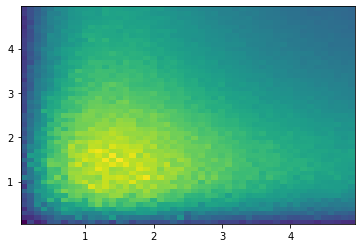

In [14]:
plt.hist2d(isigmas_vtx, isigmas_coincidence, bins=[np.arange(0.05,5.05,0.1),np.arange(0.05,5.05,0.1)], weights=sensitivityImprovements) 

In [15]:
# 20 ps
max_idx = sensitivityImprovements.index(max(sensitivityImprovements))
print("20 ps")
print("Best values:",isigmas_vtx[max_idx],isigmas_coincidence[max_idx])
print("BG efficiency:", results[0])
print("Signal efficiency:", results[1]*np.sqrt(results[0]))
print("Max improvement:", sensitivityImprovements[max_idx])

20 ps
Best values: 1.5000000000000002 1.5000000000000002
BG efficiency: 0.017833333333333333
Signal efficiency: 0.9110697462219214
Max improvement: 8.016876646978403


In [10]:
# 60 ps
max_idx = sensitivityImprovements.index(max(sensitivityImprovements))
print("60 ps")
print("Best values:",isigmas_vtx[max_idx],isigmas_coincidence[max_idx])
print("BG efficiency:", results[0])
print("Signal efficiency:", results[1]*np.sqrt(results[0]))
print("Max improvement:", sensitivityImprovements[max_idx])

60 ps
Best values: 1.5000000000000002 1.6
BG efficiency: 0.14546666666666666
Signal efficiency: 0.9110697462219215
Max improvement: 2.600493246793915
